In [1]:
# This imports the OpenContextAPI from the api.py file in the
# opencontext directory.
%run '../opencontext/api.py'

In [2]:
import numpy as np
import pandas as pd

oc_api = OpenContextAPI()

# Clear old cached records.
oc_api.clear_api_cache()

# This is a search url for bovid tibias.
url = 'https://opencontext.org/subjects-search/?prop=obo-foodon-00001303---gbif-1---gbif-44---gbif-359---gbif-731---gbif-9614&prop=oc-gen-cat-bio-subj-ecofact---oc-gen-cat-animal-bone&prop=oc-zoo-has-anat-id---obo-uberon-0000979#2/45.0/0.0/6/any/Google-Satellite'

# Fetch the 'standard' (linked data identified) attributes in use with
# data at the url.
stnd_attribs_tuples = oc_api.get_standard_attributes(
    url,
    # The optional argument below gets popular standard
    # zooarchaeological (bone) measurements.
    add_von_den_driesch_bone_measures=True
)

# Now display the standard attributes found in this search / query result
for slug, label in stnd_attribs_tuples:
    print('{}, identified by slug: {}'.format(label, slug))

Bd, identified by slug: oc-zoo-bd
Dd, identified by slug: oc-zoo-dd
DD, identified by slug: oc-zoo-dd-2
SD, identified by slug: oc-zoo-sd
Bp, identified by slug: oc-zoo-bp
GL, identified by slug: oc-zoo-gl
CD, identified by slug: oc-zoo-cd
Dp, identified by slug: oc-zoo-dp
BFd, identified by slug: oc-zoo-bfd
Ld, identified by slug: oc-zoo-ld
BT, identified by slug: oc-zoo-bt
Ll, identified by slug: oc-zoo-ll
Has Biological Taxonomy, identified by slug: biol-term-hastaxonomy
Has fusion character, identified by slug: oc-zoo-has-fusion-char
References, identified by slug: dc-terms-references
Temporal Coverage, identified by slug: dc-terms-temporal
Has physiological sex determination, identified by slug: oc-zoo-has-phys-sex-det
Counting measure, identified by slug: wikidata-q247204


In [3]:
# Make a list of only the slugs from the list of slug, label tuples.
stnd_attribs = [slug for slug, _ in stnd_attribs_tuples]

# Make a dataframe by fetching result records from Open Context.
# This will be slow until we finish improvements to Open Context's API.
# However, the results get cached by saving as files locally. That
# makes iterating on this notebook much less painful.
df = oc_api.url_to_dataframe(url, stnd_attribs)

In [4]:
# Display a sample of the dataframe.
df.head(10)

,uri,citation uri,label,item category,project label,project uri,published,updated,latitude,longitude,...,Bp,CD,Counting measure,DD,Dd,Dp,GL,Ld,Ll,SD
0,http://opencontext.org/subjects/C8B3BF7C-5EB0-...,https://n2t.net/ark:/28722/k2pv6dg2x,Bone 2285,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T12:21:22Z,37.668196,32.827191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://opencontext.org/subjects/498E9DE2-3DF4-...,https://n2t.net/ark:/28722/k29p2zf5w,Bone 2283,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T12:21:22Z,37.668196,32.827191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://opencontext.org/subjects/D7B7C14A-5E00-...,https://n2t.net/ark:/28722/k2f18vp1t,Bone 4138,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T12:27:07Z,37.668196,32.827191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://opencontext.org/subjects/0E2852A1-E031-...,https://n2t.net/ark:/28722/k2pv6d865,Bone 18465,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T13:11:30Z,37.668196,32.827191,...,NaN,108.3,NaN,NaN,24.2,NaN,18.0,NaN,NaN,8.3
4,http://opencontext.org/subjects/40B59746-C8C8-...,https://n2t.net/ark:/28722/k25x27f7b,Bone 18464,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T13:11:30Z,37.668196,32.827191,...,NaN,NaN,NaN,NaN,19.3,NaN,NaN,NaN,NaN,NaN
5,http://opencontext.org/subjects/EA5C2AA6-8FB4-...,https://n2t.net/ark:/28722/k2fq9sc74,Bone 5436,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T12:31:10Z,37.668196,32.827191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9
6,http://opencontext.org/subjects/6F7E02F6-4D28-...,https://n2t.net/ark:/28722/k20002286,Bone 17828,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T13:09:29Z,37.668196,32.827191,...,14.0,42.9,NaN,NaN,12.8,NaN,11.2,NaN,NaN,NaN
7,http://opencontext.org/subjects/C31BA1D0-30DB-...,https://n2t.net/ark:/28722/k2rb6z55d,Bone 14941,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T13:00:57Z,37.668196,32.827191,...,NaN,NaN,NaN,NaN,25.7,NaN,20.2,NaN,NaN,NaN
8,http://opencontext.org/subjects/B2AC0346-F085-...,https://n2t.net/ark:/28722/k2cf9m969,Bone 14996,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T13:01:08Z,37.668196,32.827191,...,15.2,34.0,NaN,NaN,25.9,NaN,19.4,NaN,NaN,NaN
9,http://opencontext.org/subjects/0A636251-74AC-...,https://n2t.net/ark:/28722/k2057fz1d,Bone 9987,Animal Bone,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,2013-03-02T00:00:00Z,2020-03-28T12:45:17Z,37.668196,32.827191,...,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


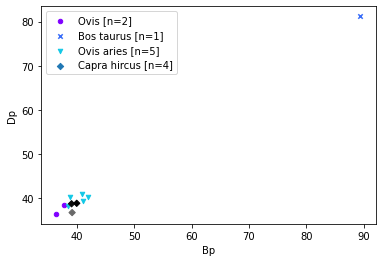

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Now we're going to make a plot.
markers = [
    'o',
    'x',
    'v',
    'D',
    'p',
    '^',
    's',
    '*',
]
colors = cm.rainbow(np.linspace(0, 1, len(markers)))
taxa = df['Has taxonomic identifier'].unique().tolist()
ax = None
i = 0
for taxon in df['Has taxonomic identifier'].unique().tolist():
    taxon_index = (
        (df['Has taxonomic identifier'] == taxon)
        & ~df['Bp'].isnull()
        & ~df['Dp'].isnull()
    )
    if df[taxon_index].empty:
        # No data for this taxon
        continue
    label = '{} [n={}]'.format(taxon, len(df[taxon_index].index))
    if not ax:
        ax = df[taxon_index].plot.scatter(
            x='Bp', 
            y='Dp', 
            marker=markers[i], 
            label=label, 
            color=colors[i].reshape(1,-1)
        )
    else:
        df[taxon_index].plot.scatter(
            x='Bp', 
            y='Dp', 
            marker=markers[i], 
            label=label, 
            ax=ax, 
            color=colors[i].reshape(1,-1)
        )
    i += 1
    if i >= len(markers):
        # This is here to make sure we don't run out of markers.
        markers += [(m + m) for m in markers]
        colors = cm.rainbow(np.linspace(0, 1, len(markers)))





In [7]:
import os

# Now save the results of all of this as a CSV file.
repo_path = os.path.dirname(os.path.abspath(os.getcwd()))
csv_path = os.path.join(
    repo_path, 
    'files',
    'oc-api-demo-results.csv'
)
df.to_csv(csv_path, index=False)
print('Saved this example as a CSV table at: {}'.format(csv_path))


Saved this example as a CSV table at: /home/ekansa/github/open-context-jupyter/files/oc-api-demo-results.csv
